In [1]:
"""
From a Re-exposure forgetting experiment dump, make a plot.
"""
import os
import torch
from collections import defaultdict
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import seaborn as sns
import scipy

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', 1000)
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [ ]:

wandb_group_names = [
    
]

In [2]:
"""
'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/avg/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/avg/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/count/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/count/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/sum/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/sum/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/avg/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/avg/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/count/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/count/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/sum/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/sum/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/CORRECT_COND/avg/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/CORRECT_COND/avg/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/CORRECT_COND/count/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/CORRECT_COND/count/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/CORRECT_COND/sum/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/CORRECT_COND/sum/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/WRONG_COND/avg/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/WRONG_COND/avg/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/WRONG_COND/count/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/WRONG_COND/count/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/WRONG_COND/sum/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/WRONG_COND/sum/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/CORRECT_COND/avg/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/CORRECT_COND/avg/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/CORRECT_COND/count/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/CORRECT_COND/count/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/CORRECT_COND/sum/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/CORRECT_COND/sum/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/WRONG_COND/avg/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/WRONG_COND/avg/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/WRONG_COND/count/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/WRONG_COND/count/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/WRONG_COND/sum/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/LL/WRONG_COND/sum/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/CORRECT_COND/avg/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/CORRECT_COND/avg/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/CORRECT_COND/count/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/CORRECT_COND/count/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/CORRECT_COND/sum/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/CORRECT_COND/sum/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/WRONG_COND/avg/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/WRONG_COND/avg/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/WRONG_COND/count/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/WRONG_COND/count/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/WRONG_COND/sum/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_noun_batch/loss/WRONG_COND/sum/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/CORRECT_COND/avg/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/CORRECT_COND/avg/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/CORRECT_COND/count/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/CORRECT_COND/count/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/CORRECT_COND/sum/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/CORRECT_COND/sum/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/WRONG_COND/avg/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/WRONG_COND/avg/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/WRONG_COND/count/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/WRONG_COND/count/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/WRONG_COND/sum/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/LL/WRONG_COND/sum/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/avg/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/avg/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/count/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/count/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/sum/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/sum/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/avg/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/avg/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/count/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/count/SE',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/sum/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/sum/SE',
"""

"\n'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/avg/mean',\n 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/avg/SE',\n 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/count/mean',\n 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/count/SE',\n 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/sum/mean',\n 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/sum/SE',\n 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/avg/mean',\n 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/avg/SE',\n 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/count/mean',\n 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/count/SE',\n 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/sum/mean',

In [3]:
# Keys of interest:
"""
'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/avg/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/avg/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/CORRECT_COND/avg/mean',
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/WRONG_COND/avg/mean',
"""

"\n'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/avg/mean',\n 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/avg/mean',\n 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/CORRECT_COND/avg/mean',\n 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/WRONG_COND/avg/mean',\n"

In [4]:
""" From final07 exp (multiple iterations)"""
groups_wandb = (
("Finetuning_2022-09-27_17-59-29_UID67863feb-7342-46a4-8c3c-6c0cab5c2c23","10","0.01"),
("Finetuning_2022-09-14_19-06-02_UID2c4355e2-c42c-46d9-ba37-8cb8abe8d1d0_MATT","1","0.01"),
)

' From final07 exp (multiple iterations)'

In [7]:
csv_parent_dir ='/home/matthiasdelange/sftp_remote_projects/ContextualOracle_Matthias/adhoc_results'
csv_file_iter1_lr0_01 = os.path.join(csv_parent_dir,"wandb_export_2022-10-12T16_16_27.716-07_00.csv")
csv_file_iter10_lr0_01 = os.path.join(csv_parent_dir,"wandb_export_2022-10-12T16_15_51.162-07_00.csv")

In [10]:
pd_iter1_df = pd.read_csv(csv_file_iter1_lr0_01).drop(['Unnamed: 0'], axis=1, errors='ignore')
pd_iter1_df

pd_iter10_df = pd.read_csv(csv_file_iter10_lr0_01).drop(['Unnamed: 0'], axis=1, errors='ignore')
pd_iter10_df

,Name,TRAIN.INNER_LOOP_ITERS,SOLVER.BASE_LR,adhoc_users_aggregate/test_action_batch/top1_acc/adhoc_hindsight_AG/mean,adhoc_users_aggregate/test_action_batch/loss/SE,adhoc_users_aggregate/test_action_batch/loss/mean,adhoc_users_aggregate/train_action_batch/loss_running_avg/mean,train_action_batch/balanced_LL,adhoc_users_aggregate/train_action_batch/balanced_LL/mean,CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/avg,...,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/count/SE,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/count/mean,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/sum/SE,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/sum/mean,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/avg/SE,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/avg/mean,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/count/SE,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/count/mean,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/sum/SE,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/sum/mean
0,Finetuning_2022-09-14_19-06-02_UID2c4355e2-c42...,1,0.01,10.91323,0.306932,5.78989,5.214387,2.985043,2.985043,42.382987,...,27.34197,138.5,17.910846,86.361118,0.074136,3.356948,50.944251,257.5,150.868583,839.524587


,Name,TRAIN.INNER_LOOP_ITERS,SOLVER.BASE_LR,adhoc_users_aggregate/test_action_batch/top1_acc/adhoc_hindsight_AG/mean,adhoc_users_aggregate/test_action_batch/loss/SE,adhoc_users_aggregate/test_action_batch/loss/mean,adhoc_users_aggregate/train_action_batch/loss_running_avg/mean,train_action_batch/balanced_LL,adhoc_users_aggregate/train_action_batch/balanced_LL/mean,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/avg/mean,...,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/count/SE,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/count/mean,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/sum/SE,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/CORRECT_COND/sum/mean,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/avg/SE,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/avg/mean,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/count/SE,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/count/mean,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/sum/SE,adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_verb_batch/loss/WRONG_COND/sum/mean
0,Finetuning_2022-09-27_17-59-29_UID67863feb-734...,10,0.01,10.01661,0.768184,9.625833,6.279683,8.068475,8.068475,74.079749,...,26.758612,140.7,7.178355,32.213428,0.084563,4.712815,51.729005,255.3,217.676209,1173.76393


In [23]:
key_fmts = [,
 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_{}_batch/loss/{}_COND/{}/mean']


# Even though sum is averaged over users, this gives factor 10 difference, but is for all nbs, so if using Wrong/Correct w.r.t. eachother still correct

print(f"ITER1")
for key_fmt in key_fmts:
    key = key_fmt.format(action_mode,mean_mode)
    print(f"{key}: {pd_iter1_df[key].tolist()[0]}")

print(f"ITER10")
for key_fmt in key_fmts:
    key = key_fmt.format(action_mode,mean_mode)
    print(f"{key}: {pd_iter10_df[key].tolist()[0]}")

ITER1
adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/sum/mean: 3302.5522090792656
adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/sum/mean: 846.4505389992231
adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/CORRECT_COND/sum/mean: 71.13970221579658
adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/WRONG_COND/sum/mean: 2000.068439310789
ITER10
adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/CORRECT_COND/sum/mean: 6267.785742378235
adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/LL/WRONG_COND/sum/mean: 935.42159591064
adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/CORRECT_COND/sum/mean: 28.274850359020277
adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_action_batch/loss/WRONG_COND/sum/mean: 2463.5758957207204


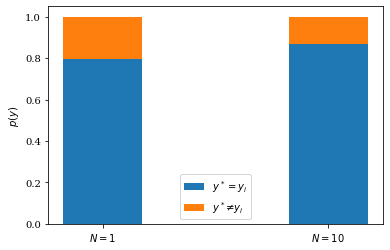

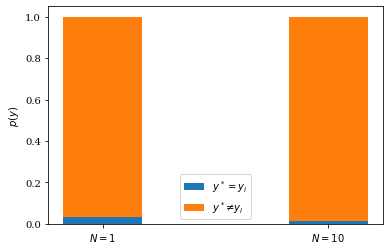

In [41]:
def get_key_name(action_mode,mean_mode,correct_mode,metric_mode):
    assert action_mode in  ['action','verb','noun']
    assert mean_mode in ['avg','count','sum']
    assert correct_mode in ['CORRECT','WRONG']
    assert metric_mode in ['LL','loss']
    
    return 'adhoc_users_aggregate/CONDITIONAL_ANALYSIS/train_{}_batch/{}/{}_COND/{}/mean'.format(
        action_mode,metric_mode, correct_mode, mean_mode
    )

action_mode = 'action'
mean_mode = 'sum'

# Configs
width = 0.35       # the width of the bars: can also be len(x) sequence


def do_plot(labels,corrects,wrongs,width):
    fig, ax = plt.subplots()

    ax.bar(labels, corrects, width, yerr=None, label=r'$y^*=y_i$')
    ax.bar(labels, wrongs, width, yerr=None, label=r'$y^*\ne y_i$', bottom=corrects)

    ax.set_ylabel('$p(y)$')
    # ax.set_title('Scores by group and gender')
    ax.legend()

    plt.show()
    plt.close('all')
    
###################################
# Likelihood

labels = ['$N=1$','$N=10$']
corrects = []
wrongs = []

LL_plot_name = r'$\mathcal{C}$'

# Iter 1
LL_iter1_correct = pd_iter1_df[get_key_name(action_mode,mean_mode,'CORRECT','LL')].tolist()[0]
LL_iter1_wrong = pd_iter1_df[get_key_name(action_mode,mean_mode,'WRONG','LL')].tolist()[0]

total_sum = LL_iter1_correct + LL_iter1_wrong
LL_iter1_correct_p = LL_iter1_correct / total_sum
LL_iter1_wrong_p = LL_iter1_wrong / total_sum

corrects.append(LL_iter1_correct_p)
wrongs.append(LL_iter1_wrong_p)


# Iter 10
LL_iter10_correct = pd_iter10_df[get_key_name(action_mode,mean_mode,'CORRECT','LL')].tolist()[0]
LL_iter10_wrong = pd_iter10_df[get_key_name(action_mode,mean_mode,'WRONG','LL')].tolist()[0]

total_sum = LL_iter10_correct + LL_iter10_wrong
LL_iter10_correct_p = LL_iter10_correct / total_sum
LL_iter10_wrong_p = LL_iter10_wrong / total_sum

corrects.append(LL_iter10_correct_p)
wrongs.append(LL_iter10_wrong_p)

do_plot(labels,corrects,wrongs,width)


###################################
# LOSS

labels = ['$N=1$','$N=10$']
corrects = []
wrongs = []

loss_plot_name = r'$\mathcal{L}$'

# Iter 1
loss_iter1_correct = pd_iter1_df[get_key_name(action_mode,mean_mode,'CORRECT','loss')].tolist()[0]
loss_iter1_wrong = pd_iter1_df[get_key_name(action_mode,mean_mode,'WRONG','loss')].tolist()[0]

total_sum = loss_iter1_correct + loss_iter1_wrong
loss_iter1_correct_p = loss_iter1_correct / total_sum
loss_iter1_wrong_p = loss_iter1_wrong / total_sum

corrects.append(loss_iter1_correct_p)
wrongs.append(loss_iter1_wrong_p)


# Iter 10
loss_iter10_correct = pd_iter10_df[get_key_name(action_mode,mean_mode,'CORRECT','loss')].tolist()[0]
loss_iter10_wrong = pd_iter10_df[get_key_name(action_mode,mean_mode,'WRONG','loss')].tolist()[0]

total_sum = loss_iter10_correct + loss_iter10_wrong
loss_iter10_correct_p = loss_iter10_correct / total_sum
loss_iter10_wrong_p = loss_iter10_wrong / total_sum

corrects.append(loss_iter10_correct_p)
wrongs.append(loss_iter10_wrong_p)

do_plot(labels,corrects,wrongs,width)

